In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np, h5py, os, matplotlib.pyplot as plt
from math import sqrt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
output_path_data = "../hdf5/Scan_{0:d}/scan_{0:d}_data.h5"
output_path_scan = "../hdf5/Scan_{0:d}/scan_{0:d}.h5"
data_paths = {'up': "detectors/lambda_up", 'far': "detectors/lambda_far", 'down': "detectors/lambda_down"}
scan_paths = {'up': "scans/lambda_up", 'far': "scans/lambda_far", 'down': "scans/lambda_down"}
fast_crds_path = "motor_coordinates/fast_coordinates"
slow_crds_path = "motor_coordinates/slow_coordinates"
detectors = {"lambda_far": "_LambdaFar.nxs", "lambda_up": "_LambdaUp.nxs", "lambda_down": "_LambdaDown.nxs"}

In [102]:
scan_file = h5py.File(os.path.abspath(output_path.format(143)), 'r')
data_far = scan_file[far_path][:]
data_up = scan_file[up_path][:]
data_down = scan_file[down_path][:]

In [103]:
sums_far = data_far.sum(axis=(-2, -1)).reshape((size, size))
sums_up = data_up.sum(axis=(-2, -1)).reshape((size, size))

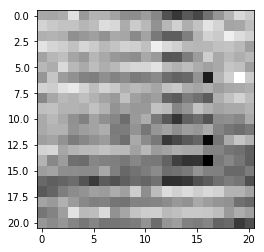

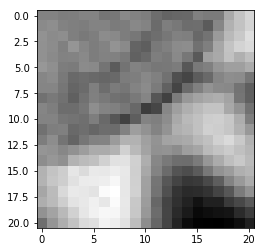

In [104]:
%matplotlib inline
plt.figure()
plt.imshow(sums_far, cmap='gist_gray')
plt.figure()
plt.imshow(sums_up, cmap='gist_gray')
plt.show()

In [391]:
scan_file = h5py.File(output_path_scan.format(299), 'r')
fast_crds, slow_crds = scan_file[fast_crds_path][:], scan_file[slow_crds_path][:]
fast_size, slow_size = scan_file["scan_size/fast_size"][()], scan_file["scan_size/slow_size"][()]
scans = dict([(detector, scan_file[path][:]) for detector, path in scan_paths.items()])

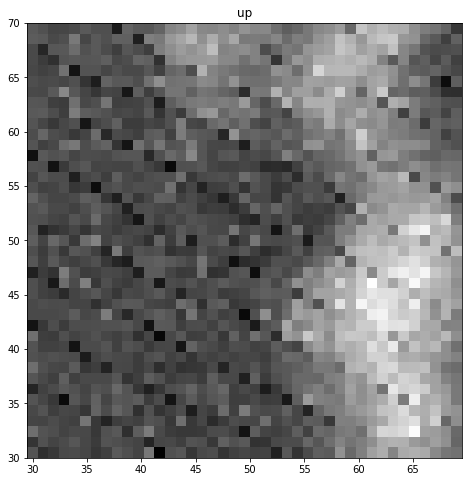

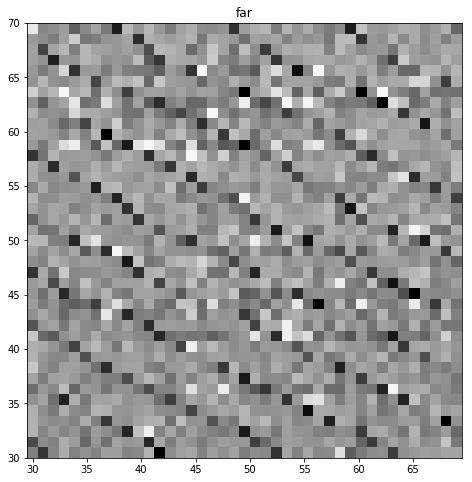

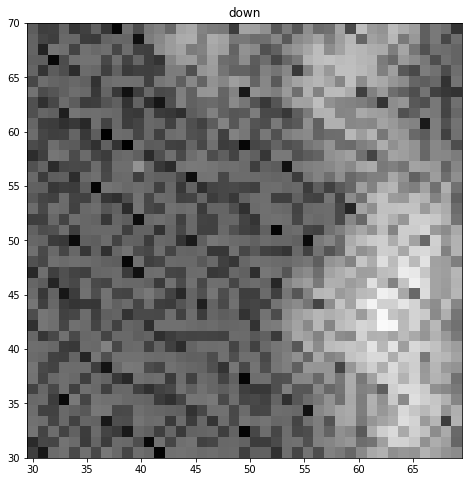

In [392]:
%matplotlib inline
vmins = [1.002, 1.002, 1.005]
vmaxs = [1.001, 1.001, 1.003]
for (detector, scan), vmin, vmax in zip(scans.items(), vmins, vmaxs):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(scan, cmap='gist_gray', vmin=vmin * scan.min(), vmax=vmax * scan.max(),
              extent=[fast_crds.min(), fast_crds.max(), slow_crds.min(), slow_crds.max()])
    ax.set_title(detector)
plt.show()

In [390]:
calib = h5py.File("/Users/nivanov/OneDrive/programming/p07_data/p07_dp/lambda_far_up_down_calibration.h5", 'r')
mask = np.invert(calib['pixelmask_down'][:].astype(bool))
shape = mask.shape
data = np.ones(shape)
print(np.where(mask, data, 0), mask)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]] [[False False False ...  True  True  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [389]:
list(calib)

['pixelmask_down', 'pixelmask_far', 'pixelmask_up']